# **Sentimentent Analysis and Modeling On Amazon Customer Reviews with 80 % Accuracy**

# **Importing Libraries**

In [1]:
# First import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Exploring Dataset**

In [3]:
df=pd.read_csv(r"D:\Users\DELL\Downloads\DEPI Graduation Project\Reviews.csv")

In [4]:

df2=df.copy()
df.head(1000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [5]:
# Know number of columns and rows
df.shape

(568454, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

**Observation:**
> I will remove all unnecessary columns and keep only 2 column which I really care about `Text`,`Score`
to perform sentiment analysis

In [8]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessDenominator','HelpfulnessNumerator','Time',
        'Summary'],axis=1,inplace=True)


In [9]:
# to ensure that there are only 2 columns
df.columns

Index(['Score', 'Text'], dtype='object')

In [10]:
# to check for null values after in Text and Score column
df.isna().sum()

Score    0
Text     0
dtype: int64

In [11]:
# To check for duplicates
df.duplicated().sum()

174779

# **Observation**:
There aren't null values but there are `174779` duplicated row ,So I will remove it from dataset

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.shape

(393675, 2)

**The number of rows in dataset after removing duplicates has transformed from `568454` to `393675`.**

# **Exploring Target Column `Score`**

In [14]:
# Show number of unique values in score column
df['Score'].nunique()

5

In [15]:
# Show unique values in score column
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

# **Distribution of Ratings in `Score` Column**

In [16]:
# Show value distibution of score ratings
df['Score'].value_counts()/len(df)*100

Score
5    63.693402
4    14.243729
1     9.215724
3     7.562583
2     5.284562
Name: count, dtype: float64

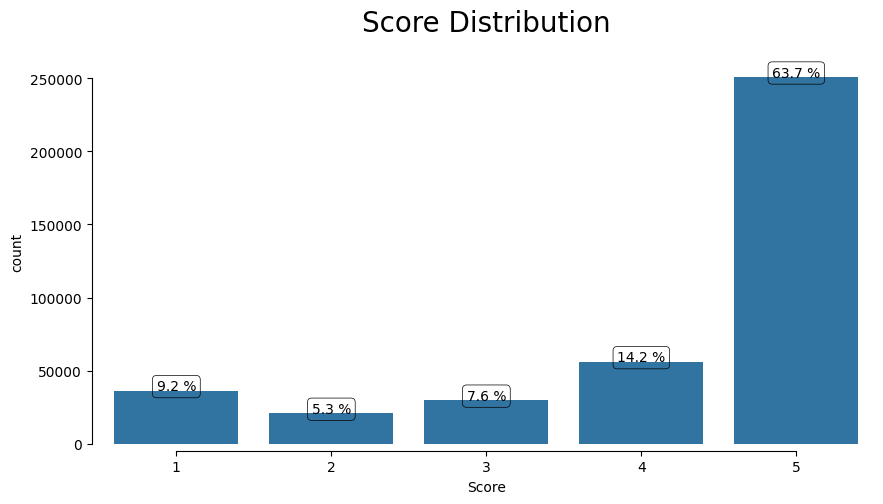

In [17]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

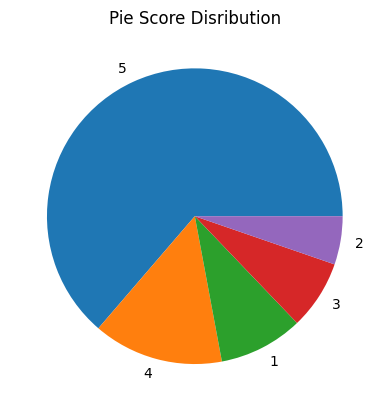

In [18]:
score_values=df['Score'].value_counts()
plt.pie(score_values,labels=score_values.index)
plt.title('Pie Score Disribution')
plt.show()

# **Observation**:
> We notice that `63.5 %` of reviews have the highest score ratings which indicate that high percentage of product reviews are positive.
>> The Distribution of score values isn't balanced at all.

# **Taking Samples from `Score` Column**

In [19]:
new_df= df.groupby('Score').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [20]:
new_df

,Score,Text
0,1,Matouk's West Indian Hot Sauce is the worst ho...
1,1,I wanted to make a black and white cake so I g...
2,1,All the box's seem to have the same items? Onl...
3,1,$36 for 32 packs. Are you Kidding? The first p...
4,1,I had bought this via Amazon's subscribe and s...
...,...,...
49995,5,"Not too sweet, dark chocolatey, gluten-free an..."
49996,5,This was my first time to try anything with ca...
49997,5,I was surprised at the aroma and smoothness of...
49998,5,After trying the Gruyeres and sesame. This is...


In [21]:
new_df.shape

(50000, 2)

**By taking from each score 20000 sample, We will have 100000 Row and by this data became balanced.**

# **To Ensure Score Distribution After Sampling**

In [22]:
new_df['Score'].value_counts()

Score
1    10000
2    10000
3    10000
4    10000
5    10000
Name: count, dtype: int64

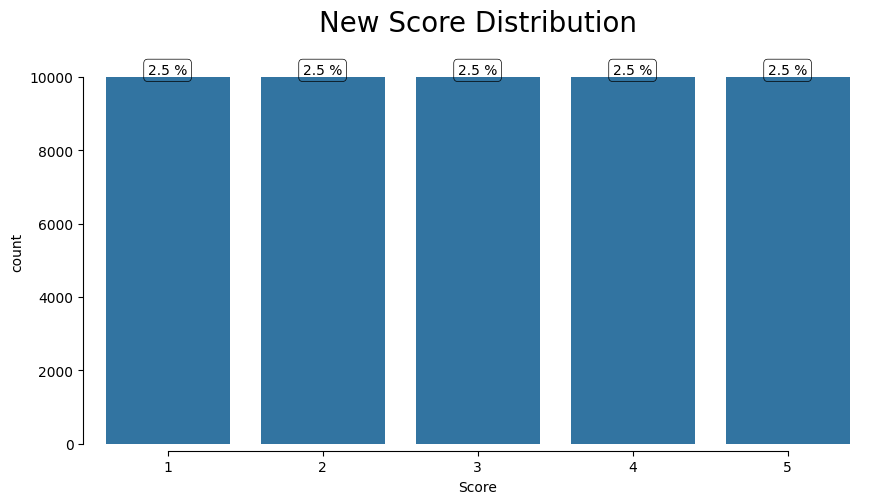

In [23]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('New Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

**As shown,`Score` Column is balanced and each value have the same distribution so the model won't be biased to specific value.**

# **Text Preprocessing**

In [24]:
# import libraies for preprocessing
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\W11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words=set(stopwords.words('english'))
#lemmatization=WordNetLemmatizer()
stemming=PorterStemmer()

In [27]:
'''import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')'''

"import nltk\nnltk.download('wordnet')\nnltk.download('punkt')\nnltk.download('omw-1.4')"

In [27]:
def clean_text(text):
    # 1. Convert to lower
    txt=text.lower()

    # 1. split to words
    tokens=word_tokenize(text)

    # 3. remove punctuation
    tokens=[word for word in tokens if word not in string.punctuation]

    # 4. Remove stopwords
    tokens=[word for word in tokens if word not in stop_words]

    # 5. Remove numbers
    tokens=[word for word in tokens if not word.isdigit()]

    # 6. Apply Stemming
    tokens=[stemming.stem(word) for word in tokens]

    # To return these single words back into one string
    return ' '.join(tokens)


In [28]:
new_df['cleaned_text'] = new_df['Text'].apply(clean_text)

In [29]:
new_df

,Score,Text,cleaned_text
0,1,Matouk's West Indian Hot Sauce is the worst ho...,matouk 's west indian hot sauc worst hot sauc ...
1,1,I wanted to make a black and white cake so I g...,i want make black white cake i got store near ...
2,1,All the box's seem to have the same items? Onl...,all box 's seem item onli differ say right sub...
3,1,$36 for 32 packs. Are you Kidding? The first p...,pack are kid the first pack i bought bj cost 7...
4,1,I had bought this via Amazon's subscribe and s...,i bought via amazon 's subscrib save sinc i pr...
...,...,...,...
49995,5,"Not too sweet, dark chocolatey, gluten-free an...",not sweet dark chocolatey gluten-fre artifici ...
49996,5,This was my first time to try anything with ca...,thi first time tri anyth carnivor plant i look...
49997,5,I was surprised at the aroma and smoothness of...,i surpris aroma smooth chai drink it quit appe...
49998,5,After trying the Gruyeres and sesame. This is...,after tri gruyer sesam thi far best flavor how...


# **Show most frequent words in text after preprocessing**

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


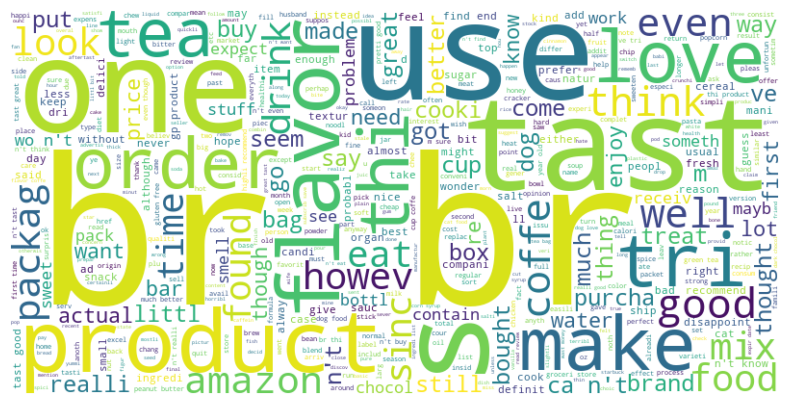

In [31]:
from wordcloud import WordCloud
# Combine all cleaned text into a single string
all_text=' '.join(new_df['cleaned_text'])



# Create the WordCloud object with the top 1000 words
wordcloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(all_text)

# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [32]:
len(set(all_text))

69

In [33]:
len(all_text)

14384270

# **Vectorizing Text to numbers before Modeling**

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForest
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



# **Spliting Data**

>Decided to Classify 5 scores into only 2 Scores: `Positive` and `Negative`,as when applying on 5 scores which was indicating `very bad`,`bad`,`good`,`very good`,`excellent` , the highest accuracy was `47.9` with `Logistic Regression`.
>>Apply Binary Classification on Reviews : `1` --> `Positive` , `0` --> `Negative`.

In [35]:
new_df['Score'] = new_df['Score'].apply(lambda x: 1 if x >=3 else 0)
# 1 --> Good 
#0 --> Bad

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X=new_df['cleaned_text']
y=new_df['Score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)


# **Modeling Using ML Models**

# **1. Logistic Regression**

In [39]:
logistic_pipe=Pipeline(
    [
      ('vec',CountVectorizer(stop_words= "english")),
        ('Tf_idf',TfidfTransformer()),
        ('log_rg',LogisticRegression()),

    ]
)


In [40]:
log_fit = logistic_pipe.fit(X_train,y_train)


In [41]:
log_pred=logistic_pipe.predict(X_test)

In [42]:
print('Training accuracy:', log_fit.score(X_train,y_train))
print('Test accuracy:', log_fit.score(X_test,y_test))

Training accuracy: 0.832125
Test accuracy: 0.7794


<Axes: >

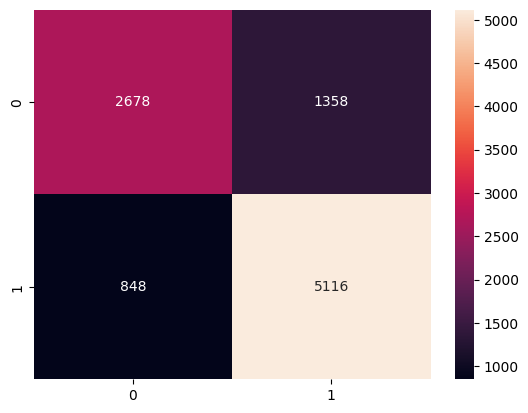

In [43]:
sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, fmt="d")

**Making Predicion using Logistic Regression**

In [44]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=logistic_pipe.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
# Predicted : P,N,P,N,P    2 errors
print(sentiment)

['Negative', 'Negative', 'Positive', 'Negative', 'Positive']


In [46]:
import pickle

# Example for saving Logistic Regression model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logistic_pipe, file)

# **2. Naive Bayes**

              precision    recall  f1-score   support

           0     0.8438    0.3612    0.5059      4036
           1     0.6883    0.9547    0.7999      5964

    accuracy                         0.7152     10000
   macro avg     0.7660    0.6580    0.6529     10000
weighted avg     0.7511    0.7152    0.6813     10000



<Axes: >

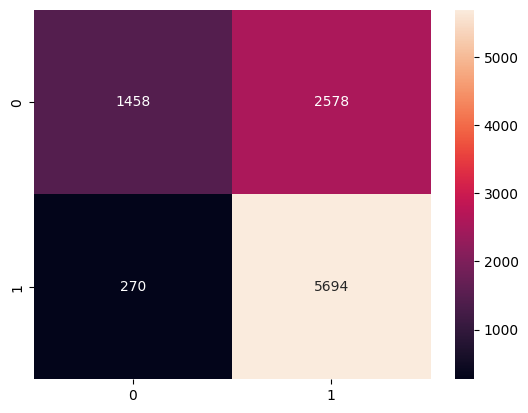

In [47]:
naive_bayes_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
nb_model = naive_bayes_pipeline.fit(X_train, y_train)
y_pred_nb = naive_bayes_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_nb,digits=4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot=True, fmt="d")

In [48]:
print('Training accuracy of Navie Bayes : ', nb_model.score(X_train,y_train))
print('Test accuracy of Navie Bayes : ', nb_model.score(X_test,y_test))

Training accuracy of Navie Bayes :  0.76205
Test accuracy of Navie Bayes :  0.7152


In [50]:
# Example for saving SVC model
with open('naive_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_pipeline, file)

# **3. SVC**

In [51]:
svm_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

# Train the model
svc = svm_pipeline.fit(X_train, y_train)
y_pred_svc = svm_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_svc,digits=4))


              precision    recall  f1-score   support

           0     0.7621    0.6660    0.7108      4036
           1     0.7918    0.8593    0.8242      5964

    accuracy                         0.7813     10000
   macro avg     0.7769    0.7627    0.7675     10000
weighted avg     0.7798    0.7813    0.7784     10000



<Axes: >

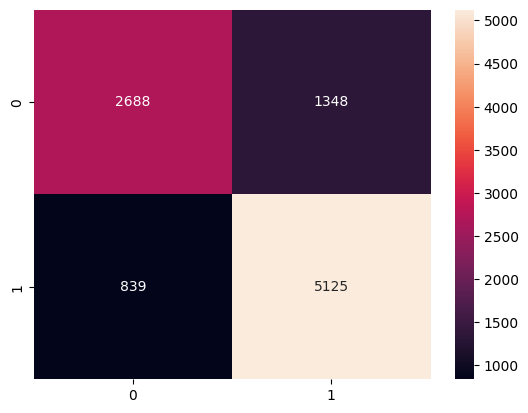

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot=True, fmt="d")

In [53]:
print('Training accuracy of SVC : ', svc.score(X_train,y_train))
print('Test accuracy of SVC : ', svc.score(X_test,y_test))

Training accuracy of SVC :  0.955575
Test accuracy of SVC :  0.7813


**Making Prediction using SVC**

In [54]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=svm_pipeline.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
# Predicted : P,N,P,N,P   # only 1 error   
print(sentiment)

['Negative', 'Negative', 'Positive', 'Negative', 'Positive']


In [55]:
# Example for saving SVC model
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(svm_pipeline, file)

# **Modeling Using Recurrent Neural Network Models `RNN`**

# **LSTM**

# **Apply LSTM on Text column only**

In [62]:
new_df['Score']

0        0
1        0
2        0
3        0
4        0
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Score, Length: 50000, dtype: int64

In [63]:
new_df['Text']

0        Matouk's West Indian Hot Sauce is the worst ho...
1        I wanted to make a black and white cake so I g...
2        All the box's seem to have the same items? Onl...
3        $36 for 32 packs. Are you Kidding? The first p...
4        I had bought this via Amazon's subscribe and s...
                               ...                        
49995    Not too sweet, dark chocolatey, gluten-free an...
49996    This was my first time to try anything with ca...
49997    I was surprised at the aroma and smoothness of...
49998    After trying the Gruyeres and sesame.  This is...
49999    Absolutely lovely! I eat this on toast or slic...
Name: Text, Length: 50000, dtype: object

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers

In [65]:
reviews=new_df['Text'].values
sentiments=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews)
sequences=tokenizer.texts_to_sequences(reviews)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments)



In [66]:
# check reviews
print(reviews)

["Matouk's West Indian Hot Sauce is the worst hot sauce I have ever tasted. The quality control is atrocious. You're better off with something else. They also have a real problem with shipping. So much so that they have a form letter they send to people who receive a USPS box full of broken glass and hot sauce to clean up. The bottom line is that the product may create problems for he person you're trying to send a gift to, instead of enhancing their life. I'll never order from them again."
 'I wanted to make a black and white cake so I got this at a store near me. As soon as I got home I sprayed a tiny bit on my hand and licked it. It smelled and tasted horrible. I threw it out within minutes of coming home from the store. I own quite a few Wilton products but would advise against getting the black spray.'
 "All the box's seem to have the same items? Only a few differences, and they say they have the right to substitute? All the pictures are the same 1960 box, Whats going on here?"
 .

In [67]:
# Check seuences hat icludes indices
print(sequences[:5])

[[12756, 3713, 1478, 184, 218, 8, 1, 743, 184, 218, 2, 19, 241, 195, 1, 185, 971, 8, 8000, 334, 81, 161, 18, 131, 435, 24, 84, 19, 3, 265, 296, 18, 245, 26, 63, 26, 13, 24, 19, 3, 994, 4023, 24, 938, 5, 242, 147, 1014, 3, 4342, 102, 345, 7, 631, 619, 4, 184, 218, 5, 681, 65, 1, 540, 538, 8, 13, 1, 31, 208, 2094, 682, 12, 128, 835, 334, 289, 5, 938, 3, 466, 5, 302, 7, 6621, 108, 686, 298, 172, 140, 41, 33, 96], [2, 363, 5, 95, 3, 338, 4, 419, 632, 26, 2, 139, 10, 35, 3, 156, 974, 47, 21, 800, 21, 2, 139, 414, 2, 5018, 3, 687, 135, 25, 16, 661, 4, 4659, 6, 6, 936, 4, 195, 660, 2, 883, 6, 51, 766, 427, 7, 1090, 414, 41, 1, 156, 2, 314, 235, 3, 169, 5104, 176, 14, 42, 3236, 1534, 325, 1, 338, 2252], [40, 1, 11936, 416, 5, 19, 1, 141, 577, 64, 3, 169, 3866, 4, 24, 164, 24, 19, 1, 199, 5, 935, 40, 1, 2582, 22, 1, 141, 102, 4487, 206, 25, 216], [2025, 12, 2208, 669, 22, 20, 3273, 1, 98, 669, 2, 114, 35, 9298, 385, 68, 529, 854, 12, 2208, 669, 20, 49, 625, 58, 3, 529, 187, 35, 1894, 25, 803, 1

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [73]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [71]:
pip install --upgrade tensorflow keras


   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB 653.6 kB/s eta 0:09:50
   ---------------------------------------- 0.1/385.2 MB 1.1 MB/s eta 0:05:54
   ---------------------------------------- 0.2/385.2 MB 1.5 MB/s eta 0:04:13
   ---------------------------------------- 0.3/385.2 MB 1.7 MB/s eta 0:03:47
   ---------------------------------------- 0.5/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 0.6/385.2 MB 2.3 MB/s eta 0:02:50
   ---------------------------------------- 0.6/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 0.6/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 0.7/385.2 MB 1.8 MB/s eta 0:03:35
   ---------------------------------------- 0.7/385.2 MB 1.8 MB/s eta 0:03:35
   ---------------------------------------- 1.3/385.2 MB 2.6 MB/s eta 0:02:

  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ------ --------------------------------- 65.6/385.2 MB 1.6 MB/s eta 0:03:17
   ------ --------------------------------- 65.6/385.2 MB 1.6 MB/s eta 0:03:17
   ------ --------------------------------- 65.6/385.2 MB 1.5 MB/s eta 0:03:27
   ------ --------------------------------- 65.6/385.2 MB 1.5 MB/s eta 0:03:27
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:29
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:29
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:29
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:29
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:29
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:29
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:29
   ------ --------------------------------- 65.7/385.2 MB 1.5 MB/s eta 0:03:39
   ------ --------------------------------- 65.7/38

In [74]:
# Compile the model
import tensorflow as tf
#op=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint(
    'best_model1.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

# Train the LSTM model
history1=model.fit(X_train, y_train, 
          epochs=12, 
          batch_size=128, 
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,model_checkpoint])

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.6893 - loss: 0.5919
Epoch 1: val_loss improved from inf to 0.53066, saving model to best_model1.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 295s 929ms/step - accuracy: 0.6895 - loss: 0.5918 - val_accuracy: 0.7470 - val_loss: 0.5307
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.8079 - loss: 0.4415
Epoch 2: val_loss improved from 0.53066 to 0.48112, saving model to best_model1.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 303s 967ms/step - accuracy: 0.8079 - loss: 0.4415 - val_accuracy: 0.7742 - val_loss: 0.4811
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - accuracy: 0.8360 - loss: 0.3907
Epoch 3: val_loss improved from 0.48112 to 0.46920, saving model to best_model1.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 304s 970ms/step - accuracy: 0.8360 - loss: 0.3907 - val_accuracy: 0.7852 - val_loss: 0.4692
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.8491 - loss: 0.3677
Epoch 4: val_loss did not impro

**Show Trainning and Validation Accuracy**

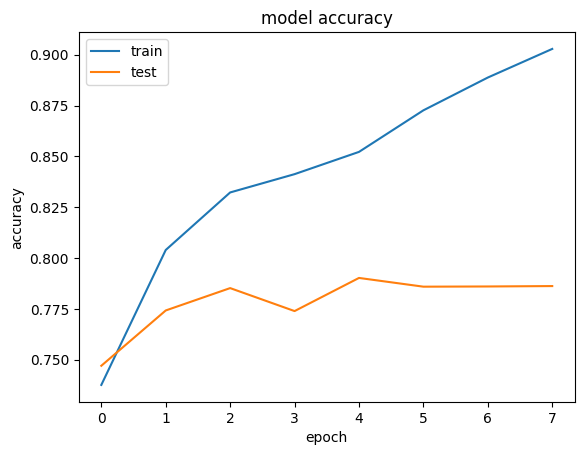

In [75]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Show Trainning and Validation Loss**

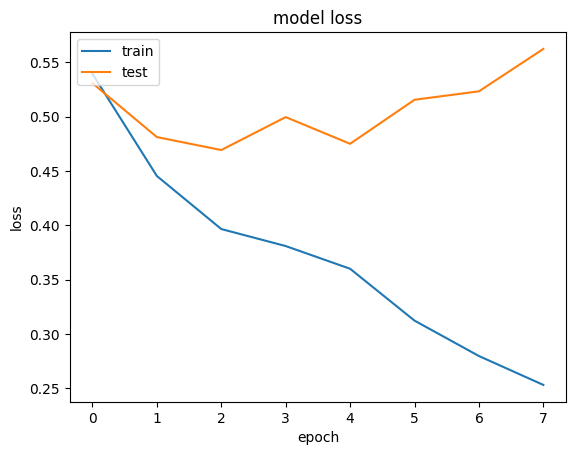

In [76]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [77]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.7859 - loss: 0.5703
Final Test Accuracy: 78.62%


In [78]:
model.save('lstm_model.h5') 

# **Apply  LSTM on Text and Summary Column after Combinning them into 1 `New_Text` column**

In [143]:
new_df['New_Text']=df['Summary']+' '+new_df['Text']
new_df['New_Text']

0        Good Quality Dog Food The wheat free brownie m...
1        Not as Advertised saltyness may be the "norm" ...
2        "Delight" says it all I purchased this product...
3        Cough Medicine Switch to this food and my dog ...
4        Great taffy please do not take this note as an...
                               ...                        
49995    Grown to really like them I bought this for Ha...
49996    Healthy Snack at a great price! My two cockers...
49997    Raw Revolution Hazelnut Cashew Ive hunted high...
49998    fantastic, but chew carefully We have a rapidl...
49999    Very Tasty and Healthy. we received this coffe...
Name: New_Text, Length: 50000, dtype: object

In [144]:

# Convert all entries to string and replace NaNs with empty stringsreviews2=new_df['New_Text'].values
reviews2 = new_df['Text'].astype(str).fillna('')  
sentiments2=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews2)
sequences=tokenizer.texts_to_sequences(reviews2)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments2)

In [145]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [146]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [147]:
# Compile the model
import tensorflow as tf
op=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint(
    'best_model2.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

# Train the LSTM model
history2=model.fit(X_train, y_train, 
          epochs=12, 
          batch_size=128, 
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,model_checkpoint])

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6779 - loss: 0.6058
Epoch 1: val_loss improved from inf to 0.48731, saving model to best_model2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 218ms/step - accuracy: 0.6780 - loss: 0.6057 - val_accuracy: 0.7756 - val_loss: 0.4873
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.8035 - loss: 0.4463
Epoch 2: val_loss improved from 0.48731 to 0.47425, saving model to best_model2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 215ms/step - accuracy: 0.8035 - loss: 0.4463 - val_accuracy: 0.7836 - val_loss: 0.4743
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.8338 - loss: 0.3918
Epoch 3: val_loss improved from 0.47425 to 0.46409, saving model to best_model2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 219ms/step - accuracy: 0.8338 - loss: 0.3918 - val_accuracy: 0.7858 - val_loss: 0.4641
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.8558 - loss: 0.3515
Epoch 4: val_loss did not improve 

**Show Trainning and Validation Accuracy**

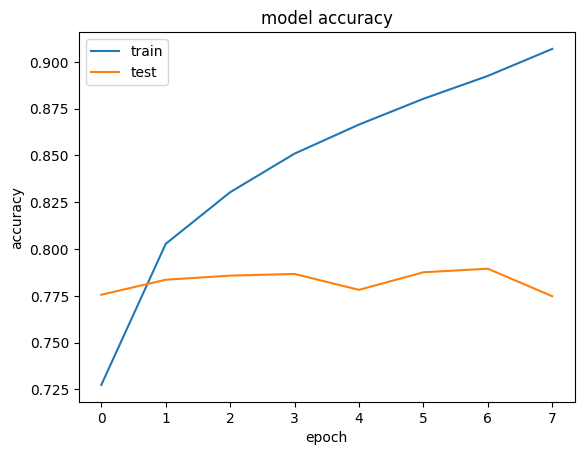

In [148]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Show Trainning and Validation Loss**

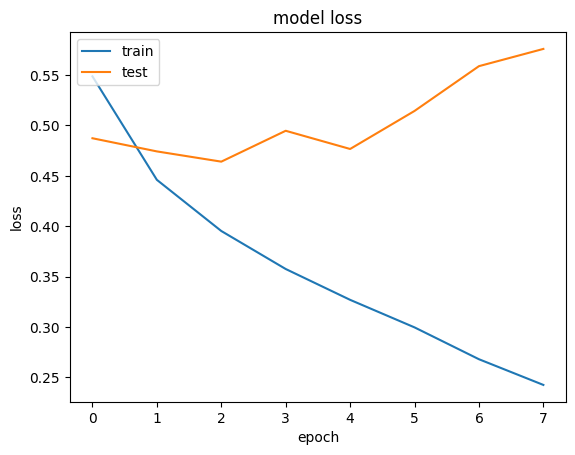

In [149]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [150]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7769 - loss: 0.5655
Final Test Accuracy: 77.48%


# **Conclusion:**
**LSTM gives highest accuracy which is almost `80 %` with model which operates only on the `Text` Column**